In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/lionel-messi/avatar-leomessi.png')
img.shape

(500, 500, 3)

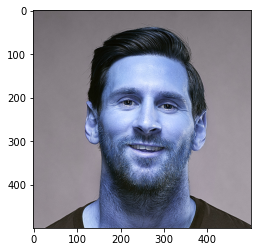

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

In [5]:
gray

array([[104, 101, 101, ..., 118, 118, 117],
       [103, 103, 104, ..., 119, 121, 119],
       [105, 105, 103, ..., 120, 119, 121],
       ...,
       [142, 146, 145, ...,  39,  71,  75],
       [150, 146, 146, ...,  41,  40,  59],
       [147, 149, 149, ...,  42,  40,  39]], dtype=uint8)

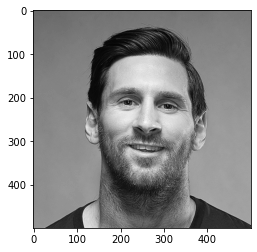

In [6]:
plt.imshow(gray, cmap='gray')

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[120, 101, 278, 278]])

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h 

(120, 101, 278, 278)

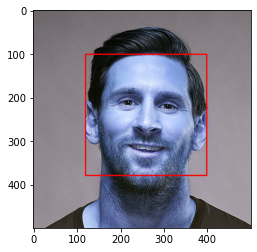

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

## Eye Detection

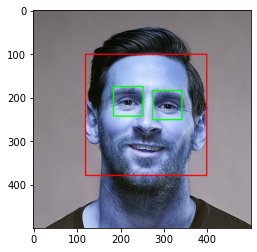

In [10]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

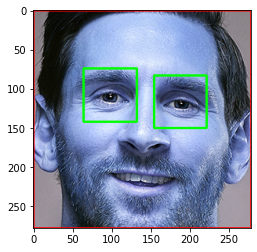

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## Get cropped faces from all images

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
        

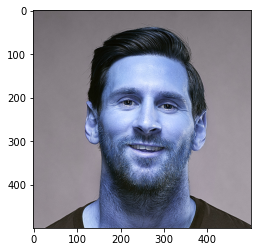

In [13]:
original_image = cv2.imread('./dataset/lionel-messi/avatar-leomessi.png')
plt.imshow(original_image)

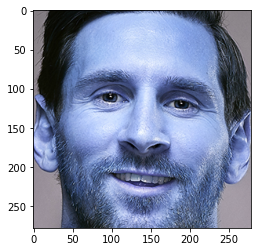

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/lionel-messi/avatar-leomessi.png')
plt.imshow(cropped_image)

In [15]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [16]:
#reading all directories
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/cropped',
 './dataset/lionel-messi',
 './dataset/maria-sharapova',
 './dataset/roger-federer',
 './dataset/ronaldo',
 './dataset/serena-williams',
 './dataset/virat-kohli']

In [18]:
#makeing of cropped folder

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
#iterate each of the directory

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1
                

cropped
lionel-messi
Generating cropped images in folder:  ./dataset/cropped/lionel-messi
maria-sharapova
Generating cropped images in folder:  ./dataset/cropped/maria-sharapova
roger-federer
Generating cropped images in folder:  ./dataset/cropped/roger-federer
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo
serena-williams
Generating cropped images in folder:  ./dataset/cropped/serena-williams
virat-kohli
Generating cropped images in folder:  ./dataset/cropped/virat-kohli


## Feature Extraction: Wavelet Transformation

In [20]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    #datatype conversions
    #convert to grayscale
    
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

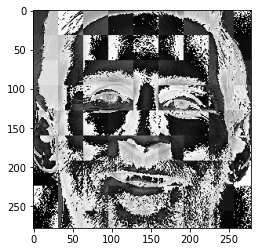

In [21]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [22]:

celebrity_file_names_dict

{'cropped': [],
 'lionel-messi': ['./dataset/cropped/lionel-messi/lionel-messi1.png',
  './dataset/cropped/lionel-messi/lionel-messi2.png',
  './dataset/cropped/lionel-messi/lionel-messi3.png',
  './dataset/cropped/lionel-messi/lionel-messi4.png',
  './dataset/cropped/lionel-messi/lionel-messi5.png',
  './dataset/cropped/lionel-messi/lionel-messi6.png',
  './dataset/cropped/lionel-messi/lionel-messi7.png',
  './dataset/cropped/lionel-messi/lionel-messi8.png',
  './dataset/cropped/lionel-messi/lionel-messi9.png',
  './dataset/cropped/lionel-messi/lionel-messi10.png',
  './dataset/cropped/lionel-messi/lionel-messi11.png',
  './dataset/cropped/lionel-messi/lionel-messi12.png',
  './dataset/cropped/lionel-messi/lionel-messi13.png',
  './dataset/cropped/lionel-messi/lionel-messi14.png',
  './dataset/cropped/lionel-messi/lionel-messi15.png',
  './dataset/cropped/lionel-messi/lionel-messi16.png',
  './dataset/cropped/lionel-messi/lionel-messi17.png',
  './dataset/cropped/lionel-messi/lionel-m

In [23]:
# generate numbers for each celebrity

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel-messi': 1,
 'maria-sharapova': 2,
 'roger-federer': 3,
 'ronaldo': 4,
 'serena-williams': 5,
 'virat-kohli': 6}

In [24]:
#do this for all the images
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [25]:
len(X[0])

4096

In [26]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [27]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(268, 4096)

In [28]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

# Model Training

##### using SVM with rbf kernel tuned with heuristic finetuning

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8059701492537313

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.80      0.44      0.57         9
           2       0.88      1.00      0.93         7
           3       1.00      0.57      0.73         7
           4       0.69      0.95      0.80        21
           5       0.86      0.67      0.75         9
           6       0.93      0.93      0.93        14

    accuracy                           0.81        67
   macro avg       0.86      0.76      0.79        67
weighted avg       0.83      0.81      0.80        67



###### Using GridSearch to try out different models with different parameters to come up with the best model with best fine tune parameters

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### define different candidate models

In [41]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random-forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
    
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.691220,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random-forest,0.527683,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.701341,{'logisticregression__C': 1}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random-forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test, y_test)

0.835820895522388

In [48]:
best_estimators['random-forest'].score(X_test, y_test)

0.6119402985074627

In [49]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8656716417910447

In [50]:
best_clf = best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  2,  2,  0],
       [ 0,  6,  1,  0,  0,  0],
       [ 0,  0,  5,  2,  0,  0],
       [ 0,  0,  0, 20,  1,  0],
       [ 0,  1,  0,  1,  7,  0],
       [ 1,  0,  0,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

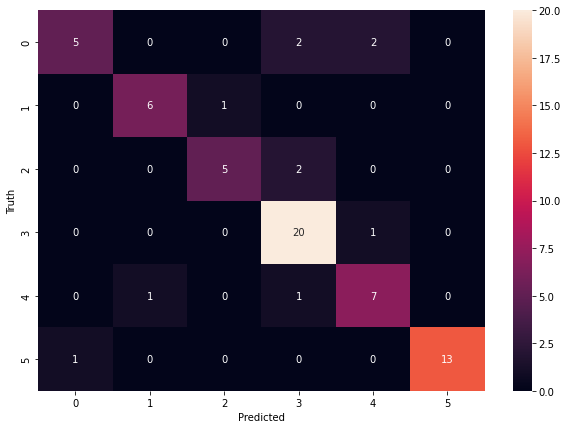

In [52]:
#plot the data

import seaborn as sn

plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
class_dict

{'cropped': 0,
 'lionel-messi': 1,
 'maria-sharapova': 2,
 'roger-federer': 3,
 'ronaldo': 4,
 'serena-williams': 5,
 'virat-kohli': 6}

#### Save the trained model

In [54]:
!pip install joblib
import joblib

#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

##### save class dictionary

In [55]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))